In [2]:
#Import Pandas
import pandas as pd 

# Import base Melbourne Property data 
data = pd.read_csv("melb_data.csv")

# Assess the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
# Import requests
import requests

# Import Melbourne resident request/complaint data via API and convert to DataFrame
ComplaintData = requests.get("https://data.melbourne.vic.gov.au/resource/ht4h-vqbu.json").json()
ComplaintDataFrame = pd.DataFrame(ComplaintData)
ComplaintDataFrame.head()

# Update request/complaint data so that it can be merged with base data
ComplaintDataFrame = ComplaintDataFrame.rename(columns={"suburb":"Suburb"})
ComplaintDataFrame = ComplaintDataFrame.drop_duplicates(subset=["Suburb"])

# Add request/complaint data to base data
data = pd.merge(data, ComplaintDataFrame, how="left", on="Suburb")

# Check the results
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Suburb            13580 non-null  object 
 1   Address           13580 non-null  object 
 2   Rooms             13580 non-null  int64  
 3   Type              13580 non-null  object 
 4   Price             13580 non-null  float64
 5   Method            13580 non-null  object 
 6   SellerG           13580 non-null  object 
 7   Date              13580 non-null  object 
 8   Distance          13580 non-null  float64
 9   Postcode          13580 non-null  float64
 10  Bedroom2          13580 non-null  float64
 11  Bathroom          13580 non-null  float64
 12  Car               13518 non-null  float64
 13  Landsize          13580 non-null  float64
 14  BuildingArea      7130 non-null   float64
 15  YearBuilt         8205 non-null   float64
 16  CouncilArea       12211 non-null  object

In [4]:
# Identify null values
data.isna().sum()

# Clean data by updating null values
data["BuildingArea"] = data["BuildingArea"].fillna(data["BuildingArea"].mean())
data["YearBuilt"] = data["YearBuilt"].fillna(data["YearBuilt"].mean())
data["Car"] = data["Car"].fillna(data["Car"].mean())
data["CouncilArea"] = data["CouncilArea"].fillna(method = "ffill")
data["request_status"] = data["request_status"].fillna("N/A")
data["date_received"] = data["date_received"].fillna("N/A")
data["date_completed"] = data["date_completed"].fillna("N/A")
data["category"] = data["category"].fillna("N/A")
data["service_desc"] = data["service_desc"].fillna("N/A")
data["request_status"] = data["CouncilArea"].fillna("N/A")
data["days_to_complete"] = data["days_to_complete"].fillna("N/A")

# Check the results
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
request_status      0
date_received       0
date_completed      0
category            0
service_desc        0
days_to_complete    0
dtype: int64

In [5]:
import re

# Create regex expression
RegexExpression = "^[0-9]*\.*[0-9]*$"

# Create a loop function using the regex expression to check if any prices don't match the expression
for price in  data["Price"].astype("str"):
    if re.match(RegexExpression, str(price))==True:
        print("Price does not match the regular expression")

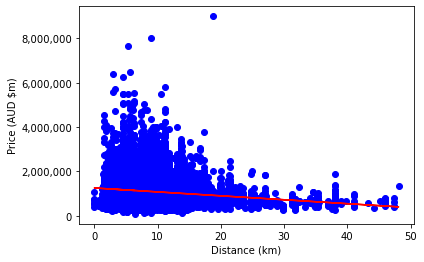

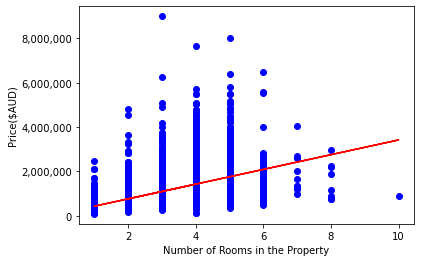

In [6]:
# Import matplotlib.pyplot, sklearn.cluster, and sklearn's LinearRegression machine learning module
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.linear_model import LinearRegression

# Create custom function to built correlation charts
def makeChart(indVariable,indVariableLabel, depVariable, depVariableLabel, model):
    # Fit the model to the data
    model.fit(indVariable, depVariable)

    # Make predictions
    predictions = model.predict(indVariable)

    # Create scatter plot
    plt.scatter(indVariable, depVariable, color="blue")
    plt.ticklabel_format(useOffset=False, style="plain")
    
    # Create line plot
    plt.plot(indVariable, predictions, color="red")

    plt.xlabel(indVariableLabel, )
    plt.ylabel(depVariableLabel)
    
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

    # Display the plot
    plt.show()

# Input variables and run the model to create charts
regModel = LinearRegression()

makeChart(data["Distance"].values.reshape(-1, 1), "Distance (km)", data["Price"].values, "Price (AUD $m)", regModel)
makeChart(data["Rooms"].values.reshape(-1, 1), "Number of Rooms in the Property", data["Price"].values, "Price($AUD)", regModel)


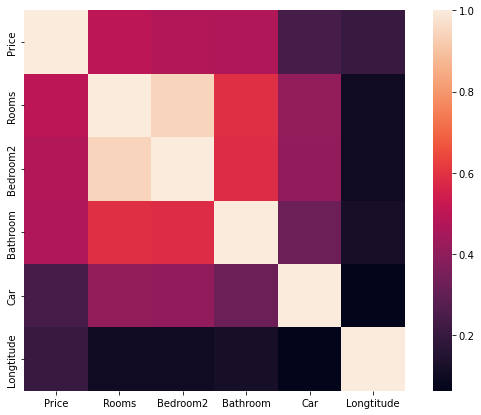

In [7]:
# Import seaborn
import seaborn as sns

# Create heatmap chart to identify which attributes are most correlated to price
HeatMap = data.corr()
k = 6
cols = HeatMap.nlargest(k, 'Price')['Price'].index
plt.subplots(figsize=(10, 7))
sns.heatmap(data[cols].corr(), vmax=1, square=True);

In [8]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = data[["Rooms","Bedroom2","Bathroom","Car","Longtitude"]].values
y = data[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Fit the model to the data
regModel.fit(X_train, y_train)

# Make predictions
y_pred = regModel.predict(X_test)

# Compute R-squared
r_squared = regModel.score(X_test, y_test)

# Print the metrics
print("R^2: {}".format(r_squared))

R^2: 0.321636662728329


In [20]:
# Import Lasso
from sklearn.linear_model import Lasso

# Initialise scores as an empty list to capture values and instantiate a lasso regression model
scores = []
for alpha in [10.0, 100.0, 500.0, 1000.0, 5000.0]:
    lasso = Lasso(alpha=alpha)

#Fit the model to the data
    lasso.fit(X_train, y_train)
    
#Compute and populate the coefficients into the empty list and print 
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.32163861028722374, 0.3216533829611947, 0.3216766157105809, 0.32161010005816704, 0.3171762209328369]
